In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Import Data

In [3]:
df = pd.read_csv('diamonds_hw.csv')

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
# menghitung presentase null pada kolom carat 
presentase = (53940-53815)/53940 *100
presentase

0.23173896922506487

In [10]:
# nilai presentase null pada kolom carat 0.23%, maka kita dapat menghapus baris yang terdapat nilai null pada kolom carat 
data_copy = df.copy() # menduplikat data frame, supaya data aslinya tidak berubah 
data_filter = data_copy[~data_copy['carat'].isnull()]# memfilter data null pada kolom carat 
data_filter



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53815 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53815 non-null  object 
 2   color    53815 non-null  object 
 3   clarity  53815 non-null  object 
 4   depth    53815 non-null  float64
 5   table    53815 non-null  float64
 6   price    53815 non-null  int64  
 7   x        53815 non-null  float64
 8   y        53815 non-null  float64
 9   z        53815 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [18]:
'''pada tabel data_filter, sudah tidak terdapat nilai null
selanjutya kita akan memeriksa apakah ada nilai 0 pada kolom x,y dan z'''

data_filter[(data_filter['x'] == 0.0) | (data_filter['y'] == 0) | (data_filter['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [19]:
'''angka 0 pada tabel x,y dan z tidak menyatakan nilai dimensi diamond, sehingga nilai tersebut abnormal.'''
data_filter[(data_filter['x'] == 0.0) | (data_filter['y'] == 0) | (data_filter['z'] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2207 to 51506
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    20 non-null     float64
 1   cut      20 non-null     object 
 2   color    20 non-null     object 
 3   clarity  20 non-null     object 
 4   depth    20 non-null     float64
 5   table    20 non-null     float64
 6   price    20 non-null     int64  
 7   x        20 non-null     float64
 8   y        20 non-null     float64
 9   z        20 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.7+ KB


In [148]:
'''sebanyak 20 baris yang terdapat nilai 0 di kolom x,y atau z
presentase baris yang kolom x,y, atau z bernilai 0'''
presentase = 20/53815 *100
presentase

0.0371643593793552

In [130]:
'''karena presentasenya 0.037 %, maka kita akan memfilter data yang bernilai 0 pada kolom x,y atau z'''
data_filter_2 = data_filter[(data_filter['x'] != 0.0) & (data_filter['y'] != 0) & (data_filter['z'] != 0)].reset_index()
data_filter_2

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53790,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53791,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53792,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53793,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [131]:
data_filter_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53795 entries, 0 to 53794
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53795 non-null  int64  
 1   carat    53795 non-null  float64
 2   cut      53795 non-null  object 
 3   color    53795 non-null  object 
 4   clarity  53795 non-null  object 
 5   depth    53795 non-null  float64
 6   table    53795 non-null  float64
 7   price    53795 non-null  int64  
 8   x        53795 non-null  float64
 9   y        53795 non-null  float64
 10  z        53795 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### NOMOR 2

In [132]:
data_filter_2['clarity'].unique()
# uniqe() untuk mengakses varibel apa saja yang terdapat dalam suatu kolom
# hasilnya berupa array

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [133]:
urutan_clarity = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2':6,
    'VVS1': 7,
    'IF': 8
}

In [134]:
data_filter_2['clarity'] = data_filter_2['clarity'].map(urutan_clarity)
data_filter_2

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,3,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,5,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,4,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53790,53935,0.72,Ideal,D,3,60.8,57.0,2757,5.75,5.76,3.50
53791,53936,0.72,Good,D,3,63.1,55.0,2757,5.69,5.75,3.61
53792,53937,0.70,Very Good,D,3,62.8,60.0,2757,5.66,5.68,3.56
53793,53938,0.86,Premium,H,2,61.0,58.0,2757,6.15,6.12,3.74


In [135]:
data_filter_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53795 entries, 0 to 53794
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53795 non-null  int64  
 1   carat    53795 non-null  float64
 2   cut      53795 non-null  object 
 3   color    53795 non-null  object 
 4   clarity  53795 non-null  int64  
 5   depth    53795 non-null  float64
 6   table    53795 non-null  float64
 7   price    53795 non-null  int64  
 8   x        53795 non-null  float64
 9   y        53795 non-null  float64
 10  z        53795 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 4.5+ MB


''' kolom clarity sudah diubah menjadi tipe numerik sesuai urutannya masing-masing'''

#### Nomor 3:

In [136]:
def outlier(kolom):
    q1 = data_filter_2[kolom].quantile(0.25)
    q3 = data_filter_2[kolom].quantile(0.75)
    iqr = q3 - q1
    print(f"batas bawah {q1-1.5*iqr}")
    print(f"batas atas {q3+1.5*iqr}")
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data_filter_2[kolom].values]
    

#### MERNCARI OUTLIER PADA KOLOM X 

In [137]:
data_filter_2['outlier-x'] =  outlier(kolom = 'x')
data_filter_2

batas bawah 1.9649999999999999
batas atas 9.285


,index,carat,cut,color,clarity,depth,table,price,x,y,z,outlier-x
0,0,0.23,Ideal,E,2,61.5,55.0,326,3.95,3.98,2.43,not-outlier
1,1,0.21,Premium,E,3,59.8,61.0,326,3.89,3.84,2.31,not-outlier
2,2,0.23,Good,E,5,56.9,65.0,327,4.05,4.07,2.31,not-outlier
3,3,0.29,Premium,I,4,62.4,58.0,334,4.20,4.23,2.63,not-outlier
4,4,0.31,Good,J,2,63.3,58.0,335,4.34,4.35,2.75,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...
53790,53935,0.72,Ideal,D,3,60.8,57.0,2757,5.75,5.76,3.50,not-outlier
53791,53936,0.72,Good,D,3,63.1,55.0,2757,5.69,5.75,3.61,not-outlier
53792,53937,0.70,Very Good,D,3,62.8,60.0,2757,5.66,5.68,3.56,not-outlier
53793,53938,0.86,Premium,H,2,61.0,58.0,2757,6.15,6.12,3.74,not-outlier


In [138]:
data_filter_2[data_filter_2['outlier-x'] == 'outlier']

,index,carat,cut,color,clarity,depth,table,price,x,y,z,outlier-x
22674,22741,3.01,Fair,H,1,56.1,62.0,10761,9.54,9.38,5.31,outlier
22763,22831,3.00,Good,I,1,57.0,64.0,10863,9.38,9.31,5.33,outlier
23575,23644,3.65,Fair,H,1,67.1,53.0,11668,9.53,9.48,6.38,outlier
24060,24131,3.24,Premium,H,1,62.1,58.0,12300,9.44,9.40,5.85,outlier
24226,24297,3.22,Ideal,I,1,62.6,55.0,12545,9.49,9.42,5.92,outlier
24257,24328,3.50,Ideal,H,1,62.8,57.0,12587,9.65,9.59,6.03,outlier
24743,24816,3.00,Premium,G,1,59.7,60.0,13203,9.42,9.26,5.58,outlier
25386,25460,3.01,Premium,G,2,59.8,58.0,14220,9.44,9.37,5.62,outlier
25775,25850,3.00,Good,J,2,59.3,64.0,14918,9.32,9.19,5.50,outlier
25922,25998,4.01,Premium,I,1,61.0,61.0,15223,10.14,10.10,6.17,outlier


In [139]:
data_filter_2[data_filter_2['outlier-x'] == 'outlier'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 22674 to 27601
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      24 non-null     int64  
 1   carat      24 non-null     float64
 2   cut        24 non-null     object 
 3   color      24 non-null     object 
 4   clarity    24 non-null     int64  
 5   depth      24 non-null     float64
 6   table      24 non-null     float64
 7   price      24 non-null     int64  
 8   x          24 non-null     float64
 9   y          24 non-null     float64
 10  z          24 non-null     float64
 11  outlier-x  24 non-null     object 
dtypes: float64(6), int64(3), object(3)
memory usage: 2.4+ KB


#### sebanyak 24 baris pada kolom x yang outlier. bernilai lebih dari 9.285 

#### MENCARI OUTLIER PADA KOLOM Y 

In [140]:
data_filter_2['outlier-y'] =  outlier(kolom = 'y')
data_filter_2

batas bawah 1.9899999999999993
batas atas 9.27


,index,carat,cut,color,clarity,depth,table,price,x,y,z,outlier-x,outlier-y
0,0,0.23,Ideal,E,2,61.5,55.0,326,3.95,3.98,2.43,not-outlier,not-outlier
1,1,0.21,Premium,E,3,59.8,61.0,326,3.89,3.84,2.31,not-outlier,not-outlier
2,2,0.23,Good,E,5,56.9,65.0,327,4.05,4.07,2.31,not-outlier,not-outlier
3,3,0.29,Premium,I,4,62.4,58.0,334,4.20,4.23,2.63,not-outlier,not-outlier
4,4,0.31,Good,J,2,63.3,58.0,335,4.34,4.35,2.75,not-outlier,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53790,53935,0.72,Ideal,D,3,60.8,57.0,2757,5.75,5.76,3.50,not-outlier,not-outlier
53791,53936,0.72,Good,D,3,63.1,55.0,2757,5.69,5.75,3.61,not-outlier,not-outlier
53792,53937,0.70,Very Good,D,3,62.8,60.0,2757,5.66,5.68,3.56,not-outlier,not-outlier
53793,53938,0.86,Premium,H,2,61.0,58.0,2757,6.15,6.12,3.74,not-outlier,not-outlier


In [141]:
data_filter_2[data_filter_2['outlier-y'] == 'outlier']

,index,carat,cut,color,clarity,depth,table,price,x,y,z,outlier-x,outlier-y
22674,22741,3.01,Fair,H,1,56.1,62.0,10761,9.54,9.38,5.31,outlier,outlier
22763,22831,3.00,Good,I,1,57.0,64.0,10863,9.38,9.31,5.33,outlier,outlier
23575,23644,3.65,Fair,H,1,67.1,53.0,11668,9.53,9.48,6.38,outlier,outlier
23996,24067,2.00,Premium,H,2,58.9,57.0,12210,8.09,58.90,8.06,not-outlier,outlier
24060,24131,3.24,Premium,H,1,62.1,58.0,12300,9.44,9.40,5.85,outlier,outlier
24226,24297,3.22,Ideal,I,1,62.6,55.0,12545,9.49,9.42,5.92,outlier,outlier
24257,24328,3.50,Ideal,H,1,62.8,57.0,12587,9.65,9.59,6.03,outlier,outlier
25386,25460,3.01,Premium,G,2,59.8,58.0,14220,9.44,9.37,5.62,outlier,outlier
25922,25998,4.01,Premium,I,1,61.0,61.0,15223,10.14,10.10,6.17,outlier,outlier
25923,25999,4.01,Premium,J,1,62.5,62.0,15223,10.02,9.94,6.24,outlier,outlier


In [144]:
data_filter_2[data_filter_2['outlier-y'] == 'outlier'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 22674 to 49055
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      22 non-null     int64  
 1   carat      22 non-null     float64
 2   cut        22 non-null     object 
 3   color      22 non-null     object 
 4   clarity    22 non-null     int64  
 5   depth      22 non-null     float64
 6   table      22 non-null     float64
 7   price      22 non-null     int64  
 8   x          22 non-null     float64
 9   y          22 non-null     float64
 10  z          22 non-null     float64
 11  outlier-x  22 non-null     object 
 12  outlier-y  22 non-null     object 
dtypes: float64(6), int64(3), object(4)
memory usage: 2.4+ KB


#### Sebanyak 22 baris yang outlier pada kolom y, di mana nilai batas atas outlier adalah 9.27 terdapat dua nilai yang memiliki simpangan nilai paling jauh yaitu sebesar 58.90 pada index 23996 dan 31.80 pada index 49055

#### MENCARI OUTLIER PADA KOLOM Z 

In [145]:
data_filter_2['outlier-z'] =  outlier(kolom = 'z')
data_filter_2

batas bawah 1.2150000000000003
batas atas 5.734999999999999


,index,carat,cut,color,clarity,depth,table,price,x,y,z,outlier-x,outlier-y,outlier-z
0,0,0.23,Ideal,E,2,61.5,55.0,326,3.95,3.98,2.43,not-outlier,not-outlier,not-outlier
1,1,0.21,Premium,E,3,59.8,61.0,326,3.89,3.84,2.31,not-outlier,not-outlier,not-outlier
2,2,0.23,Good,E,5,56.9,65.0,327,4.05,4.07,2.31,not-outlier,not-outlier,not-outlier
3,3,0.29,Premium,I,4,62.4,58.0,334,4.20,4.23,2.63,not-outlier,not-outlier,not-outlier
4,4,0.31,Good,J,2,63.3,58.0,335,4.34,4.35,2.75,not-outlier,not-outlier,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53790,53935,0.72,Ideal,D,3,60.8,57.0,2757,5.75,5.76,3.50,not-outlier,not-outlier,not-outlier
53791,53936,0.72,Good,D,3,63.1,55.0,2757,5.69,5.75,3.61,not-outlier,not-outlier,not-outlier
53792,53937,0.70,Very Good,D,3,62.8,60.0,2757,5.66,5.68,3.56,not-outlier,not-outlier,not-outlier
53793,53938,0.86,Premium,H,2,61.0,58.0,2757,6.15,6.12,3.74,not-outlier,not-outlier,not-outlier


In [146]:
data_filter_2[data_filter_2['outlier-z'] == 'outlier']

,index,carat,cut,color,clarity,depth,table,price,x,y,z,outlier-x,outlier-y,outlier-z
14587,14635,1.07,Ideal,F,3,60.6,57.0,5909,6.62,6.67,1.07,not-outlier,not-outlier,outlier
16233,16283,3.00,Very Good,H,1,63.1,55.0,6512,9.23,9.10,5.77,not-outlier,not-outlier,outlier
17146,17196,2.72,Fair,J,1,68.2,56.0,6870,8.46,8.43,5.76,not-outlier,not-outlier,outlier
19286,19346,3.00,Fair,H,1,67.1,57.0,8044,8.93,8.84,5.97,not-outlier,not-outlier,outlier
21691,21758,3.11,Fair,J,1,65.9,57.0,9823,9.15,9.02,5.98,not-outlier,not-outlier,outlier
22473,22540,3.02,Fair,I,1,65.2,56.0,10577,9.11,9.02,5.91,not-outlier,not-outlier,outlier
23470,23539,3.00,Good,E,1,64.2,65.0,11548,9.08,8.96,5.79,not-outlier,not-outlier,outlier
23575,23644,3.65,Fair,H,1,67.1,53.0,11668,9.53,9.48,6.38,outlier,outlier,outlier
23996,24067,2.00,Premium,H,2,58.9,57.0,12210,8.09,58.90,8.06,not-outlier,outlier,outlier
24060,24131,3.24,Premium,H,1,62.1,58.0,12300,9.44,9.40,5.85,outlier,outlier,outlier


In [147]:
data_filter_2[data_filter_2['outlier-z'] == 'outlier'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 14587 to 48280
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      29 non-null     int64  
 1   carat      29 non-null     float64
 2   cut        29 non-null     object 
 3   color      29 non-null     object 
 4   clarity    29 non-null     int64  
 5   depth      29 non-null     float64
 6   table      29 non-null     float64
 7   price      29 non-null     int64  
 8   x          29 non-null     float64
 9   y          29 non-null     float64
 10  z          29 non-null     float64
 11  outlier-x  29 non-null     object 
 12  outlier-y  29 non-null     object 
 13  outlier-z  29 non-null     object 
dtypes: float64(6), int64(3), object(5)
memory usage: 3.4+ KB


#### terdapat 29 baris pada kolom z yang outlier, simpangan terjauh ada pada index 48280 bernilai 31.80 

[]

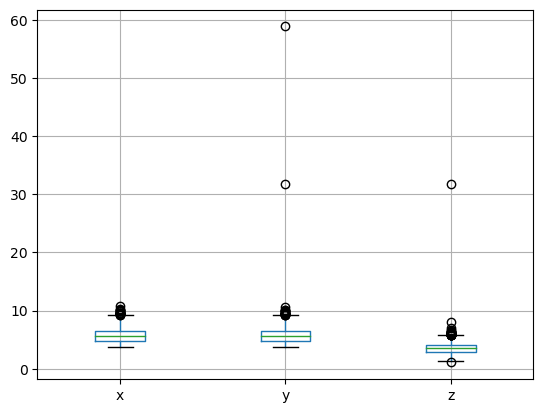

In [143]:
b_plot = data_filter_2.boxplot(column = ['x', 'y', 'z']) 
b_plot.plot()